In [322]:
import pandas as pd

In [323]:
matches = pd.read_csv("matches.csv", index_col = 0) 

In [324]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot%,g/sh,g/sot,sot,dist,fk,pk,pkatt,season,team
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Chelsea,...,45.5,0.18,0.40,5.0,19.1,0.0,0,0,2025,Manchester City
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,1.0,Ipswich Town,...,30.8,0.23,0.75,4.0,17.8,1.0,1,1,2025,Manchester City
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,1.0,West Ham,...,34.8,0.13,0.38,8.0,15.0,1.0,0,0,2025,Manchester City
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,27.8,0.11,0.40,5.0,14.8,0.0,0,0,2025,Liverpool
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,42.1,0.11,0.25,8.0,13.6,1.0,0,0,2025,Liverpool


In [325]:
matches.shape

(5380, 32)

In [326]:
# handle missing data (3 teams are relegated and 3 teams are promoted in the EPL)
matches["team"].value_counts()

team
Manchester City             269
Tottenham Hotspur           269
Everton                     269
Liverpool                   269
Manchester United           269
West Ham United             269
Chelsea                     269
Crystal Palace              269
Brighton and Hove Albion    269
Newcastle United            269
Arsenal                     269
Leicester City              231
Wolverhampton Wanderers     231
Southampton                 231
Burnley                     228
Aston Villa                 193
Bournemouth                 193
Fulham                      155
Watford                     152
Brentford                   117
Sheffield United            114
Leeds United                114
Nottingham Forest            79
Norwich City                 76
West Bromwich Albion         76
Huddersfield Town            76
Luton Town                   38
Cardiff City                 38
Swansea City                 38
Stoke City                   38
Ipswich Town                  3
Nam

In [327]:
matches["round"].value_counts().head()

round
Matchweek 1     160
Matchweek 3     160
Matchweek 2     160
Matchweek 34    140
Matchweek 28    140
Name: count, dtype: int64

In [328]:
matches["date"] = pd.to_datetime(matches["date"])  # convert date column to a datetime

In [329]:
matches.dtypes

date             datetime64[ns]
time                     object
comp                     object
round                    object
day                      object
venue                    object
result                   object
gf                      float64
ga                      float64
opponent                 object
xg                      float64
xga                     float64
poss                    float64
attendance              float64
captain                  object
formation                object
opp formation            object
referee                  object
match report             object
notes                   float64
gls                       int64
sh                      float64
sot%                    float64
g/sh                    float64
g/sot                   float64
sot                     float64
dist                    float64
fk                      float64
pk                        int64
pkatt                     int64
season                    int64
team    

In [330]:
# convert the venue string into categories, then assign a unique number to each category
matches["venue_code"] = matches["venue"].astype("category").cat.codes  

In [331]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes  # assign each opponent a unique number

In [332]:
matches['team_code'] = matches['team'].astype('category').cat.codes

In [333]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")  # remove colon and mintues and convert hour to an integer

In [334]:
matches["day_code"] = matches["date"].dt.dayofweek  # assign a value for each day of the week

In [335]:
# Return a bolean and convert bolean into 0 and 1
matches["target"] = (matches["result"] == 'W').astype("int")  # win = True and loss/draw = False

In [336]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,team_code,hour,day_code,target
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Chelsea,...,0,0,2025,Manchester City,0,7,17,16,6,1
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,1.0,Ipswich Town,...,1,1,2025,Manchester City,1,12,17,15,5,1
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,1.0,West Ham,...,0,0,2025,Manchester City,0,29,17,17,5,1
0,2024-08-17,12:30,Premier League,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,0,0,2025,Liverpool,0,12,15,12,5,1
1,2024-08-25,16:30,Premier League,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,0,0,2025,Liverpool,1,3,15,16,6,1


In [337]:
from sklearn.ensemble import RandomForestClassifier  # regression algorithm

In [338]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)  

In [339]:
train = matches[matches["date"] < '2023-05-26']  

In [340]:
test = matches[matches["date"] > '2023-05-26']  

In [341]:
predictors = ['team_code', "venue_code", "opp_code", "hour", "day_code"]

In [342]:
rf.fit(train[predictors], train["target"])  # train a random forest model with the predictors

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [343]:
preds = rf.predict(test[predictors])

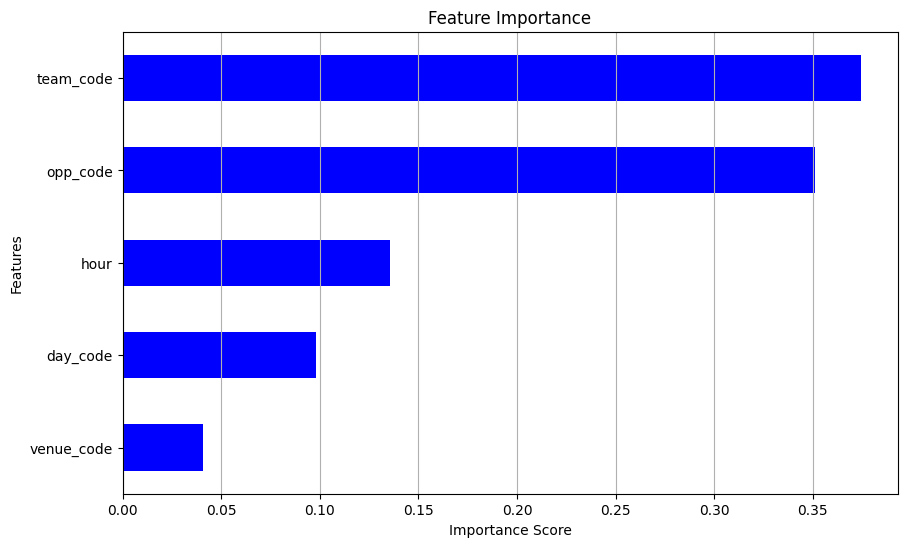

In [ ]:
import matplotlib.pyplot as plt

# display which features are the strongest predictors of match outcome
def plot_feature_importance(model, predictors):
    feature_importances = pd.Series(model.feature_importances_, index=predictors)
    feature_importances = feature_importances.sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))
    feature_importances.plot(kind="barh", color="blue")
    plt.title("Feature Importance")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.grid(axis="x")
    plt.show()

plot_feature_importance(rf, predictors)

In [290]:
from sklearn.metrics import accuracy_score

In [291]:
acc = accuracy_score(test["target"], preds)  # pass in actuals and then predictions

In [292]:
acc

0.6214285714285714

In [293]:
combined = pd.DataFrame(dict(actual=test["target"], prediction=preds))  # check in which situations our accuracy was high vs. low

In [294]:
pd.crosstab(index=combined["actual"], columns=combined["prediction"])

prediction,0,1
actual,,
0,390,122
1,196,132


In [295]:
from sklearn.metrics import precision_score

In [296]:
precision_score(test['target'], preds)

0.5196850393700787

In [297]:
grouped_matches = matches.groupby("team")  # create one dataframe for every squad in our data

In [298]:
group = grouped_matches.get_group("Manchester City")

In [299]:
group.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,team_code,hour,day_code,target
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Chelsea,...,0,0,2025,Manchester City,0,7,17,16,6,1
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,1.0,Ipswich Town,...,1,1,2025,Manchester City,1,12,17,15,5,1
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,1.0,West Ham,...,0,0,2025,Manchester City,0,29,17,17,5,1
1,2023-08-11,20:00,Premier League,Matchweek 1,Fri,Away,W,3.0,0.0,Burnley,...,0,0,2024,Manchester City,0,5,17,20,4,1
3,2023-08-19,20:00,Premier League,Matchweek 2,Sat,Home,W,1.0,0.0,Newcastle Utd,...,0,0,2024,Manchester City,1,19,17,20,5,1


In [300]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")  # sort in ascending order
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)  # remove all rows with missing values 
    return group

In [301]:
cols = ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'gls', 'sot%', 'g/sh', 'g/sot']
new_cols =  [f'{c}_rolling' for c in cols]

In [302]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling',
 'gls_rolling',
 'sot%_rolling',
 'g/sh_rolling',
 'g/sot_rolling']

In [303]:
rolling_averages(group, cols, new_cols).head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,gls_rolling,sot%_rolling,g/sh_rolling,g/sot_rolling
3,2017-09-09,12:30,Premier League,Matchweek 4,Sat,Home,W,5.0,0.0,Liverpool,...,17.333333,6.000000,18.566667,1.333333,0.000000,0.000000,1.333333,34.100000,0.076667,0.223333
5,2017-09-16,15:00,Premier League,Matchweek 5,Sat,Away,W,6.0,0.0,Watford,...,17.000000,8.000000,16.733333,0.666667,0.000000,0.000000,2.666667,50.200000,0.180000,0.306667
7,2017-09-23,15:00,Premier League,Matchweek 6,Sat,Home,W,5.0,0.0,Crystal Palace,...,19.666667,9.000000,15.800000,0.333333,0.333333,0.333333,4.333333,50.766667,0.226667,0.436667
9,2017-09-30,17:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Chelsea,...,21.666667,9.333333,14.900000,0.000000,0.333333,0.333333,5.333333,48.733333,0.256667,0.540000
10,2017-10-14,15:00,Premier League,Matchweek 8,Sat,Home,W,7.0,2.0,Stoke City,...,23.000000,7.666667,16.233333,0.333333,0.333333,0.333333,4.000000,32.900000,0.150000,0.440000


In [ ]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [305]:
matches_rolling = matches_rolling.droplevel('team')

In [306]:
matches_rolling.index = range(matches_rolling.shape[0])   # unique value for each index

In [307]:
matches_rolling.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling,gls_rolling,sot%_rolling,g/sh_rolling,g/sot_rolling
0,2017-10-01,12:00,Premier League,Matchweek 7,Sun,Home,W,2.0,0.0,Brighton,...,14.333333,5.333333,17.400000,1.333333,0.333333,0.333333,1.666667,34.800000,0.083333,0.176667
1,2017-10-14,17:30,Premier League,Matchweek 8,Sat,Away,L,1.0,2.0,Watford,...,17.000000,5.000000,18.333333,1.666667,0.333333,0.333333,1.333333,27.833333,0.050000,0.150000
2,2017-10-22,13:30,Premier League,Matchweek 9,Sun,Away,W,5.0,2.0,Everton,...,16.333333,6.333333,19.366667,1.666667,0.333333,0.333333,1.666667,44.000000,0.086667,0.206667
3,2017-10-28,15:00,Premier League,Matchweek 10,Sat,Home,W,2.0,1.0,Swansea City,...,21.333333,9.333333,18.533333,1.333333,0.000000,0.000000,2.666667,48.466667,0.120000,0.260000
4,2017-11-05,14:15,Premier League,Matchweek 11,Sun,Away,L,1.0,3.0,Manchester City,...,18.666667,8.333333,17.866667,0.666667,0.000000,0.000000,2.666667,47.600000,0.133333,0.310000


In [308]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2023-05-26']
    test = data[data['date'] > '2023-05-26']
    rf.fit(train[predictors], train['target'])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test['target'], prediction=preds), index=test.index)
    precision = precision_score(test['target'], preds)
    return combined, precision

In [309]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols)

In [310]:
precision  # imporved precision score

0.56

In [311]:
combined

,actual,prediction
209,1,0
210,1,0
211,1,0
212,0,1
213,1,1
...,...,...
4813,0,0
4814,0,0
4815,0,0
4816,0,0


In [312]:
combined = combined.merge(matches_rolling[['date', 'team', 'opponent', 'result']], left_index=True, right_index=True) 

In [313]:
combined.head()

,actual,prediction,date,team,opponent,result
209,1,0,2023-05-28,Arsenal,Wolves,W
210,1,0,2023-08-12,Arsenal,Nott'ham Forest,W
211,1,0,2023-08-21,Arsenal,Crystal Palace,W
212,0,1,2023-08-26,Arsenal,Fulham,D
213,1,1,2023-09-03,Arsenal,Manchester Utd,W


In [314]:
class MissingDict(dict):
    __missing__ = lambda self, key: key  # in case a team is missing

map_values = {
    "Brighton and Hove Albion": "Brighton",
    "Manchester United": "Manchester Utd",
    "Newcastle United": "Newcastle Utd",
    "Tottenham Hotspur": "Tottenham",
    "West Ham United": "West Ham",
    "Wolverhampton Wanderers": "Wolves"
}

mapping = MissingDict(**map_values)

In [315]:
mapping['West Ham United']

'West Ham'

In [316]:
combined["new_team"] = combined["team"].map(mapping)

In [317]:
combined.head()

,actual,prediction,date,team,opponent,result,new_team
209,1,0,2023-05-28,Arsenal,Wolves,W,Arsenal
210,1,0,2023-08-12,Arsenal,Nott'ham Forest,W,Arsenal
211,1,0,2023-08-21,Arsenal,Crystal Palace,W,Arsenal
212,0,1,2023-08-26,Arsenal,Fulham,D,Arsenal
213,1,1,2023-09-03,Arsenal,Manchester Utd,W,Arsenal


In [318]:
merged = combined.merge(combined, left_on=['date', 'new_team'], right_on=['date', 'opponent']) 

In [319]:
merged

,actual_x,prediction_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,prediction_y,team_y,opponent_y,result_y,new_team_y
0,1,0,2023-08-12,Arsenal,Nott'ham Forest,W,Arsenal,0,0,Nottingham Forest,Arsenal,L,Nottingham Forest
1,1,0,2023-08-21,Arsenal,Crystal Palace,W,Arsenal,0,0,Crystal Palace,Arsenal,L,Crystal Palace
2,0,1,2023-08-26,Arsenal,Fulham,D,Arsenal,0,0,Fulham,Arsenal,D,Fulham
3,1,1,2023-09-03,Arsenal,Manchester Utd,W,Arsenal,0,1,Manchester United,Arsenal,L,Manchester Utd
4,1,1,2023-09-17,Arsenal,Everton,W,Arsenal,0,0,Everton,Arsenal,L,Everton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0,0,2024-05-11,Wolverhampton Wanderers,Crystal Palace,L,Wolves,1,0,Crystal Palace,Wolves,W,Crystal Palace
695,0,0,2024-05-19,Wolverhampton Wanderers,Liverpool,L,Wolves,1,1,Liverpool,Wolves,W,Liverpool
696,0,0,2024-08-17,Wolverhampton Wanderers,Arsenal,L,Wolves,1,1,Arsenal,Wolves,W,Arsenal
697,0,0,2024-08-25,Wolverhampton Wanderers,Chelsea,L,Wolves,1,0,Chelsea,Wolves,W,Chelsea


In [320]:
merged[(merged['prediction_x'] == 1) & (merged['prediction_y'] == 0)]['actual_x'].value_counts()

actual_x
1    111
0     72
Name: count, dtype: int64

In [321]:
# Project inspired by a dataquest tutorial